<h3> Comparision of VGG16 and ResNet50 for Flower vs Car classification using fine tuning pre-trained models</h3>

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
vgg_model=VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
resnet_model=ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [3]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
vgg_classifier=Sequential()
for layer in vgg_model.layers:
    layer.trainable=False
    vgg_classifier.add(layer)
vgg_classifier.add(Flatten())
vgg_classifier.add(Dense(4096,activation='relu'))
vgg_classifier.add(Dense(256,activation='relu'))
vgg_classifier.add(Dense(128,activation='relu'))
vgg_classifier.add(Dense(1,activation='sigmoid'))
vgg_classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
vgg_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [6]:
from keras.layers import AveragePooling2D
from keras.models import Model
for layer in resnet_model.layers:
    layer.trainable=False
resnet_classifier=resnet_model.output
resnet_classifier = AveragePooling2D(pool_size=(7, 7))(resnet_classifier)
resnet_classifier = Flatten()(resnet_classifier)
resnet_classifier = Dense(1024,activation='relu')(resnet_classifier)
resnet_classifier = Dense(256,activation='relu')(resnet_classifier)
resnet_classifier = Dense(128,activation='relu')(resnet_classifier)
resnet_classifier = Dense(1,activation='sigmoid')(resnet_classifier)
model=Model(inputs=resnet_model.input, outputs=resnet_classifier)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255.0, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255.0)

In [8]:
training_set=train_datagen.flow_from_directory('Dataset/training_set',target_size = (224, 224),batch_size = 32,class_mode = 'binary')
test_set=train_datagen.flow_from_directory('Dataset/test_set',target_size = (224, 224),batch_size = 32,class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9057155678089665673
]


In [10]:
vgg_history = vgg_classifier.fit_generator(training_set,steps_per_epoch=100,epochs=10, verbose=1, validation_data=test_set, validation_steps=30, shuffle=False)

/home/surya/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 526s 5s/step - loss: 1.0150 - accuracy: 0.7914 - val_loss: 0.2697 - val_accuracy: 0.8990
Epoch 2/10
100/100 [==============================] - 525s 5s/step - loss: 0.2544 - accuracy: 0.8938 - val_loss: 0.2593 - val_accuracy: 0.9094
Epoch 3/10
100/100 [==============================] - 520s 5s/step - loss: 0.2468 - accuracy: 0.9034 - val_loss: 0.2624 - val_accuracy: 0.8865
Epoch 4/10
100/100 [==============================] - 518s 5s/step - loss: 0.2115 - accuracy: 0.9117 - val_loss: 0.1931 - val_accuracy: 0.9167
Epoch 5/10
100/100 [==============================] - 509s 5s/step - loss: 0.1803 - accuracy: 0.9252 - val_loss: 0.2496 - val_accuracy: 0.9115
Epoch 6/10
100/100 [==============================] - 510s 5s/step - loss: 0.1727 - accuracy: 0.9262 - val_loss: 0.2699 - val_accuracy: 0.8896
Epoch 7/10
100/100 [==============================] - 509s 5s/step - loss: 0.1655 - accuracy: 0.9265 - val_loss: 0.1910 - val_accuracy: 0.9135

In [11]:
resnet_history = model.fit_generator(training_set,steps_per_epoch=100,epochs=10, verbose=1, validation_data=test_set, validation_steps=30, shuffle=False)

Epoch 1/10
100/100 [==============================] - 199s 2s/step - loss: 0.7193 - accuracy: 0.5146 - val_loss: 0.6608 - val_accuracy: 0.6198
Epoch 2/10
100/100 [==============================] - 197s 2s/step - loss: 0.6557 - accuracy: 0.6072 - val_loss: 0.6507 - val_accuracy: 0.6542
Epoch 3/10
100/100 [==============================] - 197s 2s/step - loss: 0.6609 - accuracy: 0.6100 - val_loss: 0.5995 - val_accuracy: 0.6844
Epoch 4/10
100/100 [==============================] - 197s 2s/step - loss: 0.6080 - accuracy: 0.6733 - val_loss: 0.5615 - val_accuracy: 0.7240
Epoch 5/10
100/100 [==============================] - 197s 2s/step - loss: 0.5931 - accuracy: 0.6896 - val_loss: 0.5608 - val_accuracy: 0.7229
Epoch 6/10
100/100 [==============================] - 197s 2s/step - loss: 0.5799 - accuracy: 0.6969 - val_loss: 0.6220 - val_accuracy: 0.6396
Epoch 7/10
100/100 [==============================] - 196s 2s/step - loss: 0.5989 - accuracy: 0.6671 - val_loss: 0.5781 - val_accuracy: 0.7177

In [12]:
resnet_history = model.fit_generator(training_set,steps_per_epoch=100,epochs=10, verbose=1, validation_data=test_set, validation_steps=30, shuffle=False)

Epoch 1/10
100/100 [==============================] - 202s 2s/step - loss: 0.5504 - accuracy: 0.7316 - val_loss: 0.6707 - val_accuracy: 0.5823
Epoch 2/10
100/100 [==============================] - 202s 2s/step - loss: 0.5608 - accuracy: 0.7075 - val_loss: 0.5418 - val_accuracy: 0.7365
Epoch 3/10
100/100 [==============================] - 201s 2s/step - loss: 0.5380 - accuracy: 0.7319 - val_loss: 0.6049 - val_accuracy: 0.6938
Epoch 4/10
100/100 [==============================] - 201s 2s/step - loss: 0.5379 - accuracy: 0.7316 - val_loss: 0.5294 - val_accuracy: 0.7312
Epoch 5/10
100/100 [==============================] - 202s 2s/step - loss: 0.5212 - accuracy: 0.7453 - val_loss: 0.4977 - val_accuracy: 0.7635
Epoch 6/10
100/100 [==============================] - 201s 2s/step - loss: 0.5502 - accuracy: 0.7166 - val_loss: 0.5933 - val_accuracy: 0.7260
Epoch 7/10
100/100 [==============================] - 202s 2s/step - loss: 0.5352 - accuracy: 0.7475 - val_loss: 0.5968 - val_accuracy: 0.6969

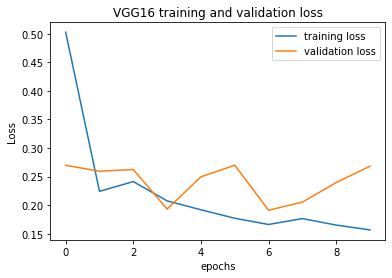

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('VGG16 training and validation loss')
plt.show()

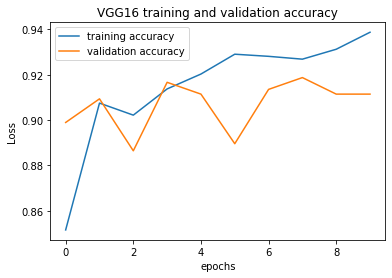

In [16]:
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('VGG16 training and validation accuracy')
plt.show()

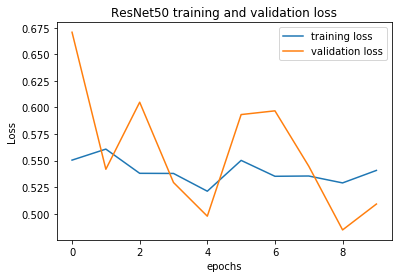

In [17]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('ResNet50 training and validation loss')
plt.show()

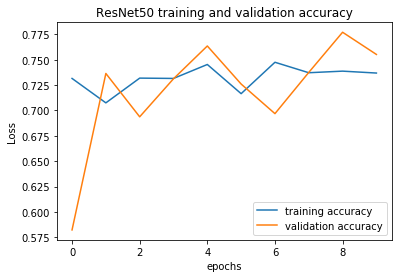

In [19]:
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('ResNet50 training and validation accuracy')
plt.show()

<h4> As we can see VGG16 was able to attain better accuracy with lesser number of epochs as compared to ResNet50</h4>